# 연령별취업자수관계

- 국가통계포털에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기

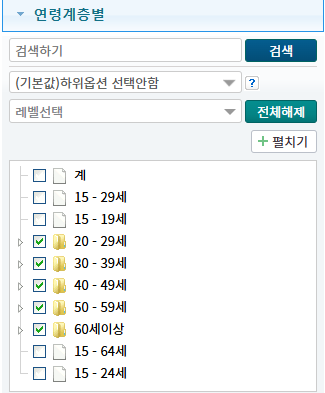 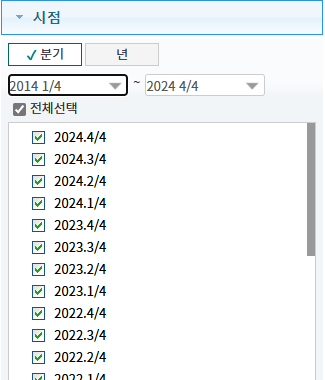 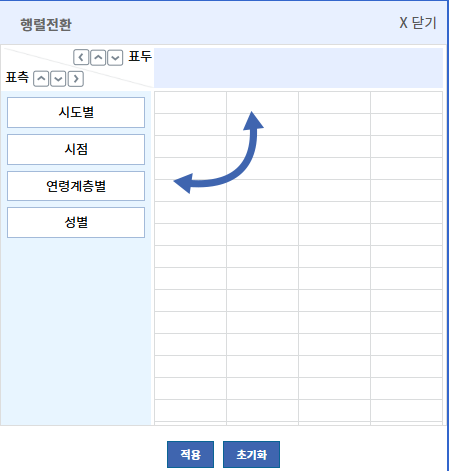

In [1]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

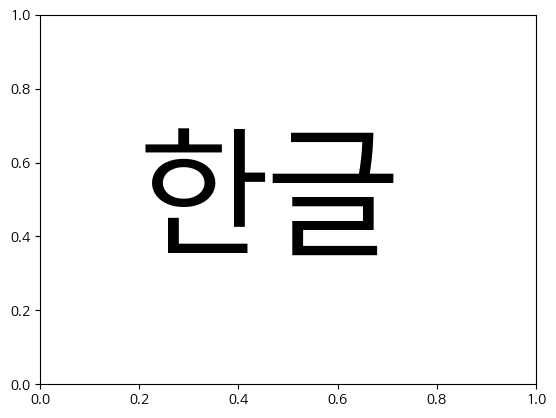

In [2]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [3]:
file_path = "./ref/행정구역시도성연령별취업자_20250304.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [4]:
ex_data = ori.copy() # 복사
ex_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex_data.loc[ex_data['resion']=='세종특별자치시','value'] = ex_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [5]:
ex_data['value'] = ex_data['value'].astype(int)
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")

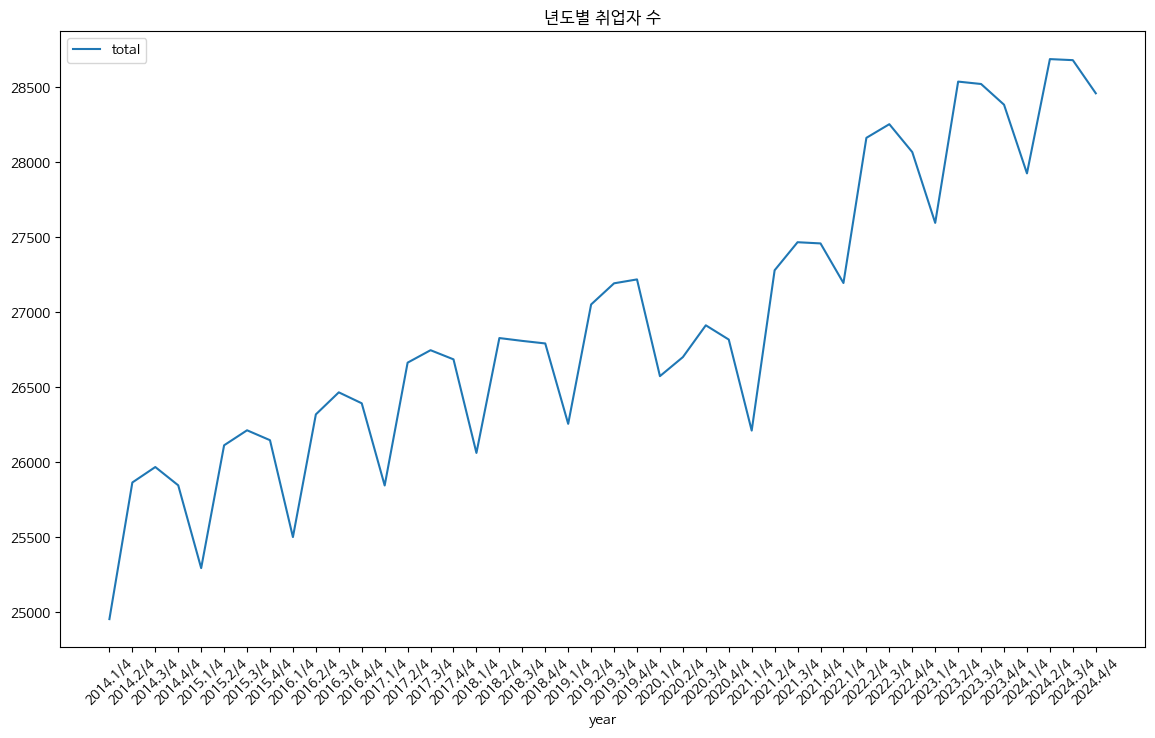

In [6]:
ax = ex1_data.plot(x='year', y='total', figsize=(14,8), title="년도별 취업자 수")
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data['year'],rotation=45)
plt.show()

In [7]:
ex2_data = ori.copy() # 복사
ex2_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex2_data.loc[ex2_data['resion']=='세종특별자치시','value'] = ex2_data.loc[ex2_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex2_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [8]:
ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

,year,gender,total
0,2014.1/4,남자,14650
1,2014.1/4,여자,10305
2,2014.2/4,남자,15027
3,2014.2/4,여자,10839
4,2014.3/4,남자,15088
...,...,...,...
83,2024.2/4,여자,12716
84,2024.3/4,남자,15945
85,2024.3/4,여자,12737
86,2024.4/4,남자,15868


In [9]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

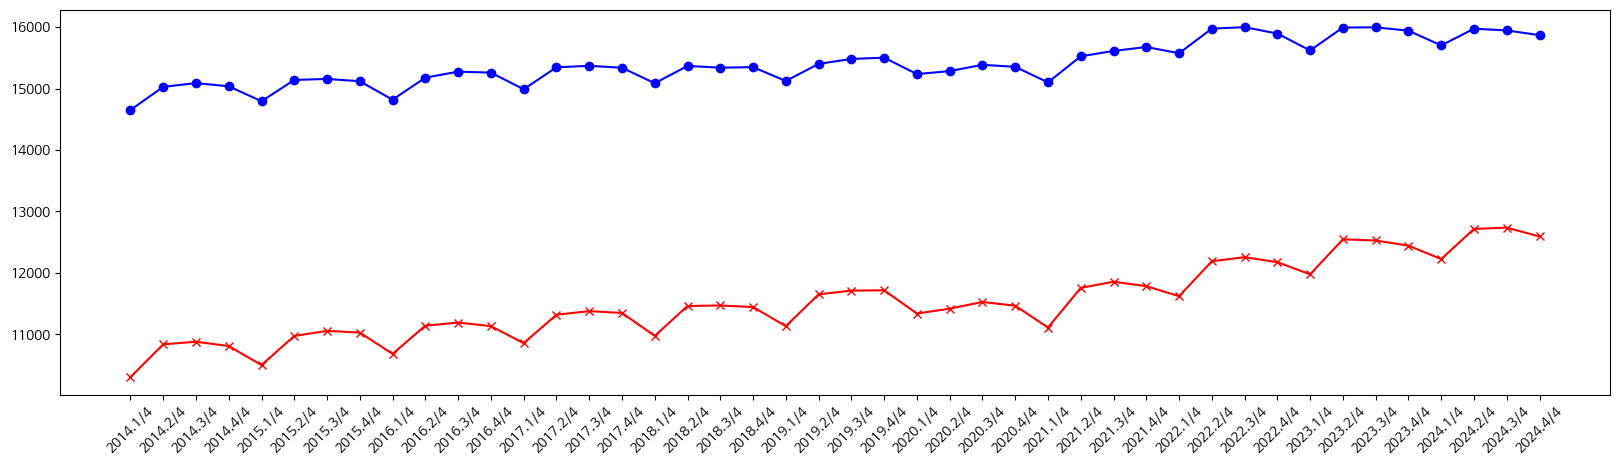

In [10]:
plt.figure(figsize=(20,5))
plt.plot(male['year'],male['total'],label='남자',color="blue",linestyle='-',marker='o')
plt.plot(female['year'],female['total'],label='여자',color="red",linestyle='-',marker='x')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

In [11]:
ex3_data = ori.copy() # 복사
ex3_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex3_data.loc[ex3_data['resion']=='세종특별자치시','value'] = ex3_data.loc[ex3_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex3_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [12]:
ex3_data['value'] = ex3_data['value'].astype(int)
ex3_data.loc[ex3_data['resion'] =='부산광역시']
ex4_data = ex3_data.loc[ex3_data['resion'] == '부산광역시']
ex4_data

,resion,year,age,gender,value
440,부산광역시,2014.1/4,20 - 29세,남자,96
441,부산광역시,2014.1/4,20 - 29세,여자,121
442,부산광역시,2014.1/4,30 - 39세,남자,221
443,부산광역시,2014.1/4,30 - 39세,여자,129
444,부산광역시,2014.1/4,40 - 49세,남자,247
...,...,...,...,...,...
875,부산광역시,2024.4/4,40 - 49세,여자,152
876,부산광역시,2024.4/4,50 - 59세,남자,218
877,부산광역시,2024.4/4,50 - 59세,여자,180
878,부산광역시,2024.4/4,60세이상,남자,215


In [13]:
ex4_data['value'] = ex4_data['value'].astype(int)
gen = ex4_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

C:\Users\Admin\AppData\Local\Temp\ipykernel_14108\3620589931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex4_data['value'] = ex4_data['value'].astype(int)


,year,gender,total
0,2014.1/4,남자,951
1,2014.1/4,여자,680
2,2014.2/4,남자,976
3,2014.2/4,여자,716
4,2014.3/4,남자,982
...,...,...,...
83,2024.2/4,여자,756
84,2024.3/4,남자,926
85,2024.3/4,여자,769
86,2024.4/4,남자,919


In [14]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

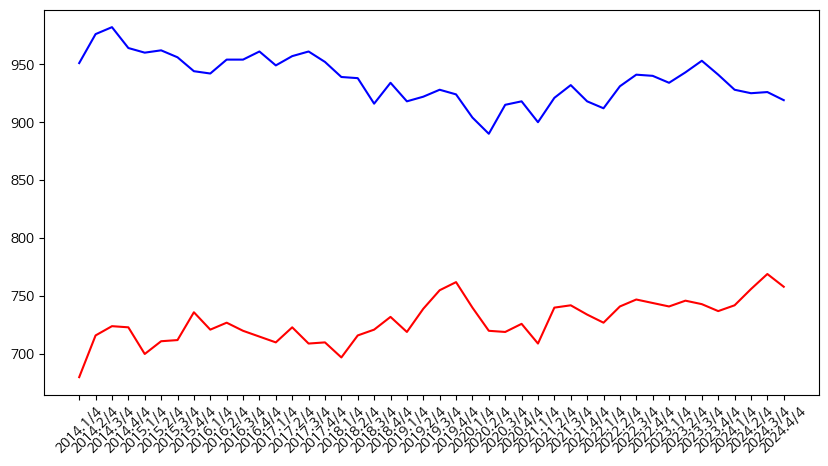

In [15]:
plt.figure(figsize=(10,5))
plt.plot(male['year'],male['total'],label='남자',color="blue",linestyle='-')
plt.plot(female['year'],female['total'],label='여자',color="red",linestyle='-')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

- 부산광역시는 서울만큼은 아니지만 여성 취업률보다 남성 취업률이 높은 것으로 보고 있습니다.
- 여성 취업률은 2014년 1분기에는 가장 낮은 것으로 보고 있지만, 2019년 2분기와 3분기에는 2014년 1분기에 비해서 가장 높은 것으로 보고 있습니다.
- 남성 취업률은 2014년 3분기에는 가장 높게 나왔지만, 그 이후부터는 조금씩 떨어지고 있는 모습을 보고 있지만, 심지어 가장 많이 떨어지고 있는 분기는 2020년 1분기로 보고 있습니다. 그 다음부터는 점차 남성 취업률이 점점 증가하고 있는 모습을 보고 있습니다. 

In [16]:
ex3_data = ori.copy()
ex3_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].replace("-",0).astype(int)

In [17]:
filter0 = (ex3_data['시점']>= "2018.1/4") & (ex3_data['시점'] < "2019.1/4")
ex3_data = ex3_data[filter0]
ex3_data.head()

,시도별,시점,연령계층별,성별,데이터
160,서울특별시,2018.1/4,20 - 29세,남자,339
161,서울특별시,2018.1/4,20 - 29세,여자,477
162,서울특별시,2018.1/4,30 - 39세,남자,693
163,서울특별시,2018.1/4,30 - 39세,여자,513
164,서울특별시,2018.1/4,40 - 49세,남자,719


In [18]:
x_data = ex3_data[ex3_data['연령계층별'].isin(['20 - 29세'])]
# x_data.loc[:,'데이터'] = x_data.loc[:,'데이터'].astype(int)
y_data = ex3_data[ex3_data['연령계층별'].isin(['60세이상'])]
# y_data.loc[:,'데이터'] = y_data.loc[:,'데이터'].astype(int)
z_data = ex3_data
# z_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].astype(int)
x = x_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 20대 취업자
y = y_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 60대(정년퇴임) 취업
z = z_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 전체 취업자 수

In [19]:
import numpy as np
regions = list(x.index) # 라벨
color = [ np.random.rand(3,) for _ in range(len(regions))] # 랜덤색상 color

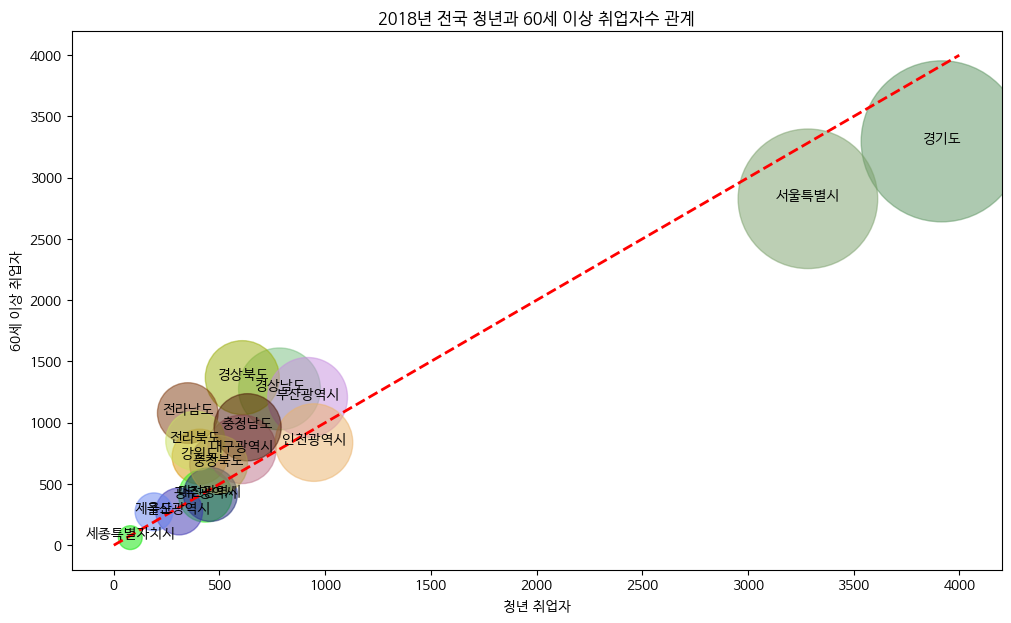

In [20]:
fig , ax = plt.subplots(figsize=(12,7))
z = np.array(z, dtype=float)
scatter = ax.scatter(x,y, s=z*0.5, c=color, alpha=0.5)

for n in range(len(regions)):
    ax.annotate(regions[n], xy=(x.iloc[n],y.iloc[n]), ha="center")

ax.plot([0,4000],[0,4000],color="r",linestyle="--",linewidth=2)

ax.set_title("2018년 전국 청년과 60세 이상 취업자수 관계")
ax.set_xlabel("청년 취업자")
ax.set_ylabel("60세 이상 취업자")
plt.show()

In [31]:
ex3_data = ori.copy()
ex3_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].replace("-",0).astype(int)

In [36]:
filter1 = (ex3_data['시점']>= "2024.1/4") # & (ex3_data['시점'] < "2025.1/4")
ex4_data = ex3_data[filter1]
ex4_data.head()

,시도별,시점,연령계층별,성별,데이터
400,서울특별시,2024.1/4,20 - 29세,남자,366
401,서울특별시,2024.1/4,20 - 29세,여자,518
402,서울특별시,2024.1/4,30 - 39세,남자,635
403,서울특별시,2024.1/4,30 - 39세,여자,571
404,서울특별시,2024.1/4,40 - 49세,남자,617


In [37]:
x_data = ex4_data[ex4_data['연령계층별'].isin(['20 - 29세'])]
# x_data.loc[:,'데이터'] = x_data.loc[:,'데이터'].astype(int)
y_data = ex4_data[ex4_data['연령계층별'].isin(['60세이상'])]
# y_data.loc[:,'데이터'] = y_data.loc[:,'데이터'].astype(int)
z_data = ex4_data
# z_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].astype(int)
x = x_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 20대 취업자
y = y_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 60대(정년퇴임) 취업
z = z_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 전체 취업자 수

In [38]:
import numpy as np
regions = list(x.index) # 라벨
color = [ np.random.rand(3,) for _ in range(len(regions))] # 랜덤색상 color

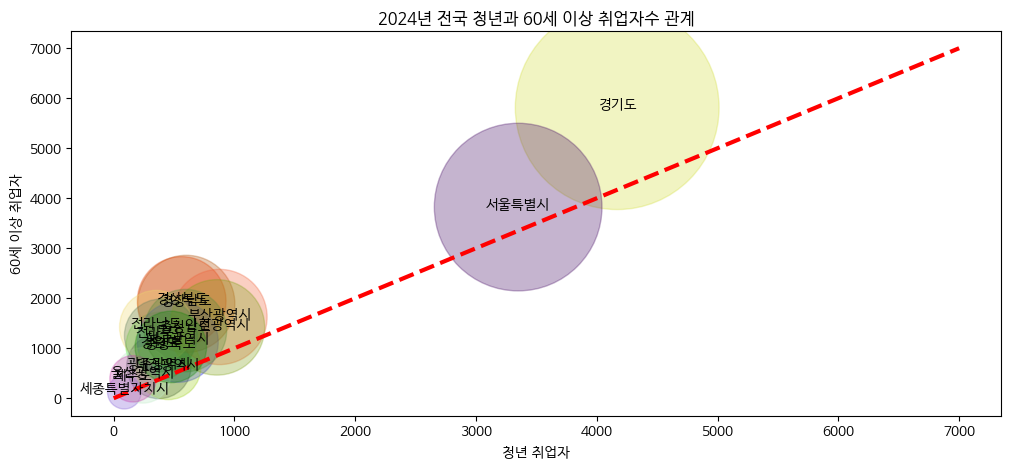

In [43]:
fig , ax = plt.subplots(figsize=(12,5))
z = np.array(z, dtype=float)
scatter = ax.scatter(x,y, s=z*0.7, c=color, alpha=0.3)

for n in range(len(regions)):
    ax.annotate(regions[n], xy=(x.iloc[n],y.iloc[n]), ha="center")

ax.plot([0,7000],[0,7000],color="r",linestyle="--",linewidth=3)

ax.set_title("2024년 전국 청년과 60세 이상 취업자수 관계")
ax.set_xlabel("청년 취업자")
ax.set_ylabel("60세 이상 취업자")

plt.show()

In [26]:
from prophet import Prophet

In [27]:
ex5_data = ex_data.groupby('year')['value'].sum().reset_index(name='total')
ex5_data.head()

,year,total
0,2014.1/4,24955
1,2014.2/4,25866
2,2014.3/4,25969
3,2014.4/4,25847
4,2015.1/4,25295


In [28]:
ex5_data = ex1_data
ex5_data = ex5_data.rename(columns={"year":"ds","total":"y"})
ex5_data["ds"] = ex5_data["ds"].str.replace(".","-")
ex5_data["ds"] = ex5_data["ds"].str.replace("/","-")
ex5_data

,ds,y
0,2014-1-4,24955
1,2014-2-4,25866
2,2014-3-4,25969
3,2014-4-4,25847
4,2015-1-4,25295
5,2015-2-4,26114
6,2015-3-4,26214
7,2015-4-4,26148
8,2016-1-4,25502
9,2016-2-4,26320


In [29]:
m = Prophet()
m.fit(ex5_data)

13:19:47 - cmdstanpy - INFO - Chain [1] start processing
13:19:47 - cmdstanpy - INFO - Chain [1] done processing


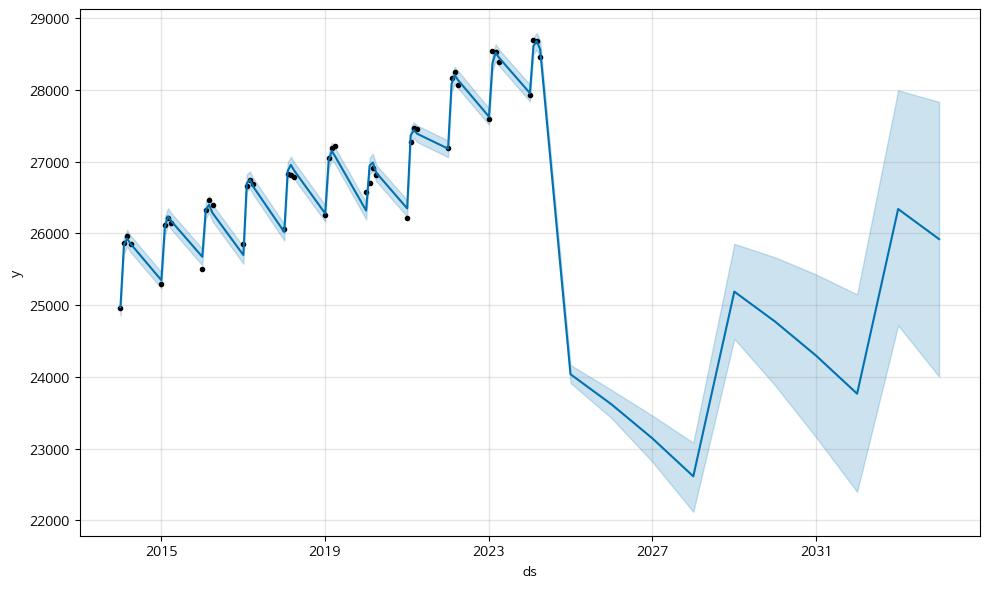

<Figure size 1000x1500 with 0 Axes>

In [30]:
future = m.make_future_dataframe(periods=10, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.figure(figsize=(10,15))
plt.show()